
**Index**

1. # [EDA](#eda)

    - ### [Final Score Analysis](#final_score_analysis)

    - ### [Correlation with Finale Score](#correlation)

2. # [PDA](#pda)

In [1]:
# import library 

import warnings
import pandas as pd
import numpy as np
import time
from tabulate import tabulate

import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


from scipy.stats import randint, uniform
from sklearn.inspection import permutation_importance

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error


<h1><a id="eda">EDA</a></h1>

### Import and Check Dataset

In [2]:
# import dataset
por = pd.read_csv('dataset/dataset/student-por.csv')

In [3]:
por.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

Dove: 
<ul>
<li><b>school</b>:  student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li><b>sex</b>: student's sex (binary: 'F' - female or 'M' - male)</li>
<li><b>age</b>: student's age (numeric: from 15 to 22)</li>
<li><b>address</b>: student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li><b>famsize</b>: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li><b>Pstatus</b>: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li><b>Medu</b>: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Fedu</b>: Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Mjob</b>: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>Fjob</b>: Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>reason</b>: reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li><b>guardian</b>: guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li><b>traveltime</b>: traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li><b>studytime</b>: studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li><b>failures</b>: number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li><b>schoolsup</b>: extra educational support (binary: yes or no)</li>
<li><b>famsup</b>: family educational support (binary: yes or no)</li>
<li><b>paid</b>: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li><b>activities</b>: extra-curricular activities (binary: yes or no)</li>
<li><b>nursery</b>: attended nursery school (binary: yes or no)</li>
<li><b>higher</b>: wants to take higher education (binary: yes or no)</li>
<li><b>internet</b>: Internet access at home (binary: yes or no)</li>
<li><b>romantic</b>: with a romantic relationship (binary: yes or no)</li>
<li><b>famrel</b>: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li><b>freetime</b>: free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li><b>goout</b>: going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Dalc</b>: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Walc</b>: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>health</b>: current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li><b>absences</b>: number of school absences (numeric: from 0 to 93)</li>

<li><b>G1</b>: first period grade (numeric: from 0 to 20)</li>
<li><b>G2</b>: second period grade (numeric: from 0 to 20)</li>
<li><b>G3</b>: final grade (numeric: from 0 to 20, output target)</li>

</ul>

In [4]:
por.shape

(649, 33)

In [5]:
len(por[por.duplicated()])

0

In [6]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


<h3><a id="final_score_analysis">Final Score Analysis</a></h3>

In [8]:
print("Media dei voti: ", round(por.G3.mean(), 2))

Media dei voti:  11.91


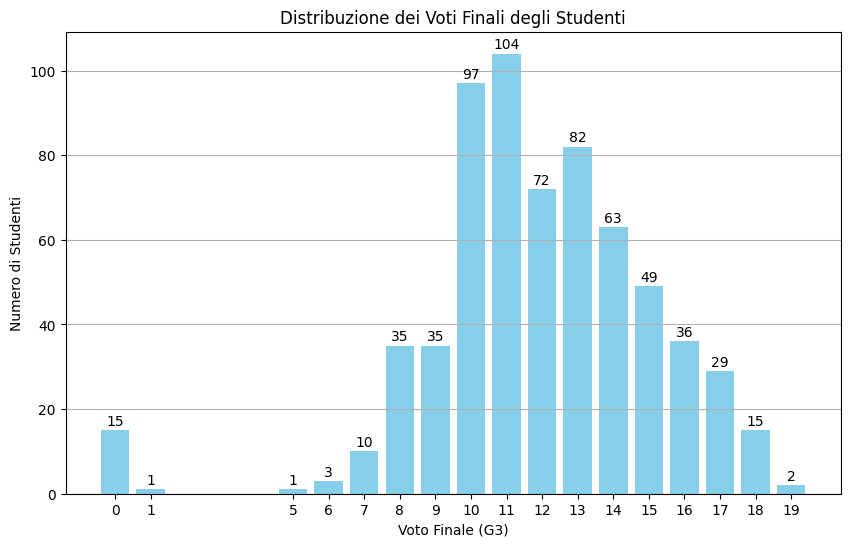

In [9]:
# Calcola il numero di studenti per ciascun voto distintivo
voti_distinti = sorted(por['G3'].unique())  # Ottieni i voti distinti e ordina
numero_studenti = por['G3'].value_counts().sort_index()  # Conta il numero di studenti per ciascun voto e ordina per voto

# Crea il grafico a istogramma
plt.figure(figsize=(10, 6))
bars = plt.bar(voti_distinti, numero_studenti, color='skyblue')

# Aggiungi il totale degli studenti sopra ogni barra
for bar, count in zip(bars, numero_studenti):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, count,
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Voto Finale (G3)')
plt.ylabel('Numero di Studenti')
plt.title('Distribuzione dei Voti Finali degli Studenti')
plt.xticks(voti_distinti)
plt.grid(axis='y')
plt.show()

In [ ]:
'''
useful links

data binning: https://medium.com/@mose.kabungo/binning-explained-557aa3cce591
'''

Binning della variabile 'G3' per rendere più leggibile l'andamento dei voti

In [10]:
bins = [0, 4, 8, 12, 16, 20]
#labels = ['Scarso', 'Mediocre', 'Sufficiente', 'Buono', 'Ottimo']
labels = ['Ottimo' , 'Buono', 'Sufficiente', 'Mediocre', 'Scarso']

# Classifica i voti 'G3' in queste fasce
por['score_range'] = pd.cut(por['G3'], bins=bins, labels=labels, right=False)

# Calcola la percentuale di studenti in ogni fascia
percentage_range = por['score_range'].value_counts(normalize=True) * 100

percentage_range = percentage_range.reindex(labels)

# Crea una palette di colori che va dal rosso al verde
pal = sns.color_palette("RdYlGn", len(labels))

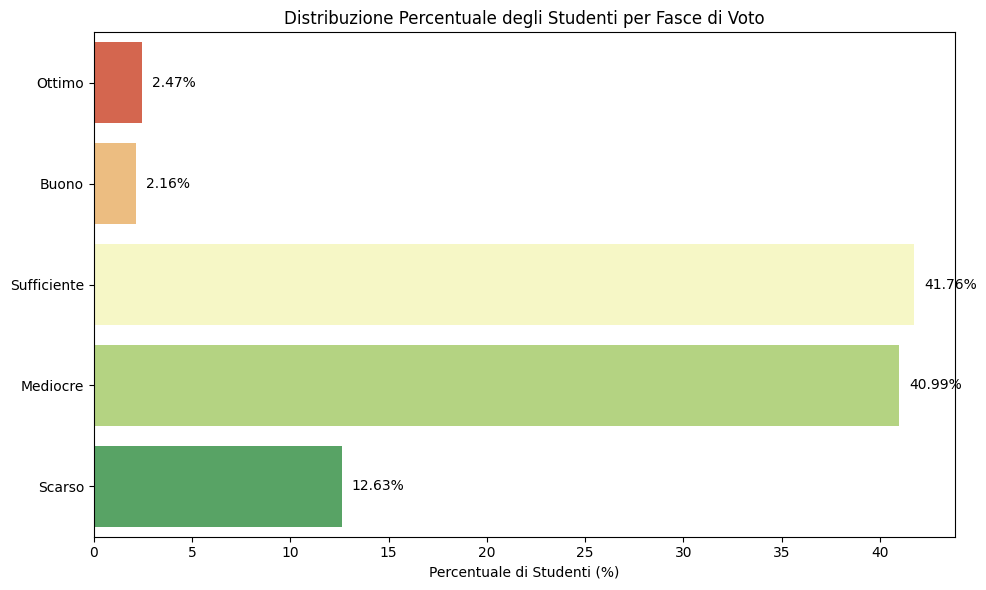

In [11]:
# Crea un istogramma delle percentuali
plt.figure(figsize=(10, 6))

sns.barplot(x=percentage_range.values, y=percentage_range.index, hue=percentage_range.index, palette=pal)

# Aggiungi le etichette e il titolo
plt.xlabel('Percentuale di Studenti (%)')
plt.ylabel('')
plt.title('Distribuzione Percentuale degli Studenti per Fasce di Voto')

# Aggiungi i valori sopra ogni barra
for i in range(len(percentage_range)):
    plt.text(percentage_range.values[i] + 0.5, i, f'{percentage_range.values[i]:.2f}%', ha='left', va='center', fontsize=10, color='black')

#plt.subplots_adjust(right=1.2)
plt.tight_layout()
plt.show()

In [12]:
por = por.drop(labels='score_range', axis=1)

<h3><a id="correlation">Correlation with finale score (G3)</a></h3>

##### Encoding categorical variables

Data la grande quantità di variabili categoriche, è stata effettuata un encoding di queste variabile, prima di generare la matrice di correlazione.

In [13]:
por_enc = por.copy()

In [14]:
label_encoders = {}
onehot_encoders = {}
mapping = {}  # LabelEncoder mapping dictionary

In [15]:
categorical_columns = por_enc.select_dtypes(exclude=['number']).columns

categorical_binary_columns = []
categorical_not_binary_columns = []


for col in categorical_columns:
        if por_enc.nunique()[col] == 2:
                categorical_binary_columns.append(col)
        else:
               categorical_not_binary_columns.append(col)

In [16]:
# Encoding non-binary variables with OneHotEncoder and updating the mapping
for col in categorical_not_binary_columns:
    onehot_encoders[col] = OneHotEncoder(categories='auto', drop='if_binary')
    encoded_values = onehot_encoders[col].fit_transform(por_enc[[col]])
    encoded_df = pd.DataFrame(encoded_values.toarray(), columns=onehot_encoders[col].get_feature_names_out([col]))
    por_enc = pd.concat([por_enc, encoded_df], axis=1)
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(onehot_encoders[col].categories_[0])}

    por_enc.drop(columns=[col], inplace=True)

In [17]:
# Encoding binary variables with LabelEncoder and updating the mapping
for col in categorical_binary_columns:
    label_encoders[col] = LabelEncoder()
    por_enc[col] = label_encoders[col].fit_transform(por_enc[col])
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(label_encoders[col].classes_)}

##### G3 - Correlation

In [18]:
# Calcolare la matrice di correlazione
correlation_matrix = por_enc.corr()
g3_correlations_abs = correlation_matrix['G3'].abs().sort_values(ascending=False)


In [19]:
g3_correlations_abs

G3                   1.000000
G2                   0.918548
G1                   0.826387
failures             0.393316
higher               0.332172
school               0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
Dalc                 0.204719
Walc                 0.176619
reason_reputation    0.170944
address              0.167637
internet             0.150025
Mjob_at_home         0.136778
Mjob_teacher         0.134910
reason_other         0.132577
sex                  0.129077
traveltime           0.127173
Fjob_teacher         0.125916
freetime             0.122705
age                  0.106505
Mjob_health          0.101244
health               0.098851
reason_course        0.098305
absences             0.091379
romantic             0.090583
goout                0.087641
guardian_other       0.080729
schoolsup            0.066405
famrel               0.063361
activities           0.059791
Mjob_other           0.059251
famsup    

In [20]:
g3_correlations_abs[g3_correlations_abs >= 0.1]

G3                   1.000000
G2                   0.918548
G1                   0.826387
failures             0.393316
higher               0.332172
school               0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
Dalc                 0.204719
Walc                 0.176619
reason_reputation    0.170944
address              0.167637
internet             0.150025
Mjob_at_home         0.136778
Mjob_teacher         0.134910
reason_other         0.132577
sex                  0.129077
traveltime           0.127173
Fjob_teacher         0.125916
freetime             0.122705
age                  0.106505
Mjob_health          0.101244
Name: G3, dtype: float64

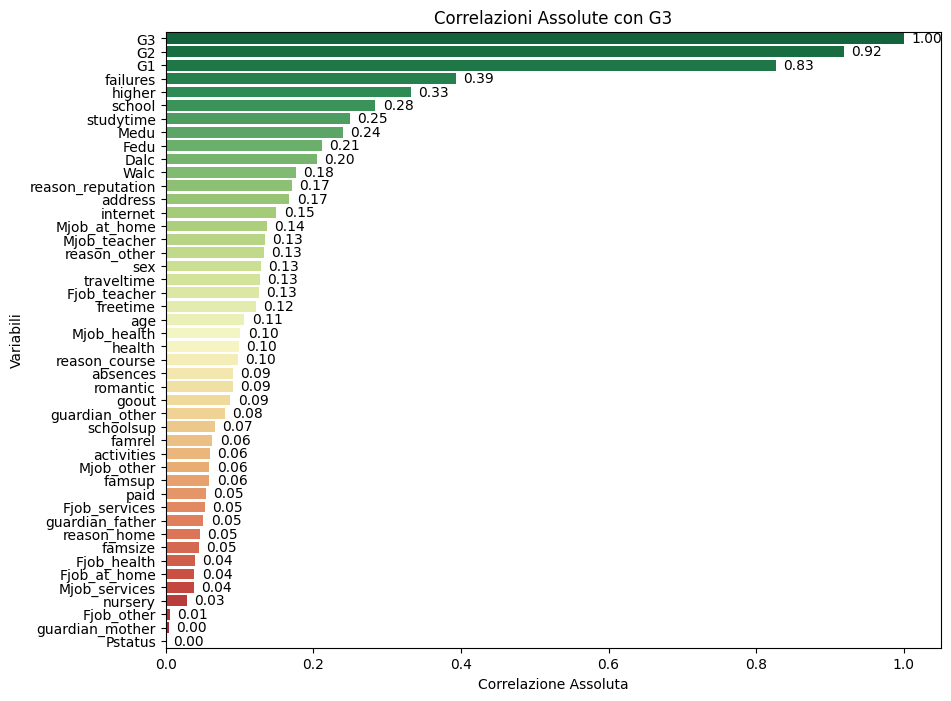

In [21]:
plt.figure(figsize=(10, 8))

# Crea una palette di colori che va dal verde al rosso
palette = sns.color_palette("RdYlGn", len(g3_correlations_abs))

# Inverti la palette per avere il verde in alto e il rosso in basso
sns.barplot(x=g3_correlations_abs.values, y=g3_correlations_abs.index, hue=g3_correlations_abs.index, orient='h', palette=palette[::-1])
plt.title('Correlazioni Assolute con G3')
plt.xlabel('Correlazione Assoluta')
plt.ylabel('Variabili')

# Aggiungi le annotazioni di valore utilizzando Matplotlib
for i, v in enumerate(g3_correlations_abs):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=10)

plt.show()

### Analisi dei voti

finalizzata a capire come possiamo classificare un voto: scarso, mediocre, sufficiente, buono, ottimo

In [ ]:
#analisi di chi non ha mai subito bocciature

print("Media degli studenti che non sono stati bocciati: ", round(por[por.failures == 0].G3.mean(), 2))
print("Media degli studenti che sono stati bocciati almeno una volta: ", round(por[por.failures != 0].G3.mean(), 2))

print("Valore massimo degli studenti che sono stati bocciati almeno una volta: ", por[por.failures != 0].G3.max())
print("Valore minimo degli studenti che sono stati bocciati almeno una volta: ", por[por.failures != 0].G3.min())

print("Valore massimo degli studenti che non sono stati mai bocciati: ", por[por.failures == 0].G3.max())
print("Valore minimo degli studenti che non sono stati mai bocciati: ", por[por.failures == 0].G3.min())

print("Media degli studenti che ambiscono a studi superiori: ", round(por[por.higher == 'yes'].G3.mean(), 2))

In [ ]:
print("Media generale: ", round(por.G3.mean(), 2))

Boxplot

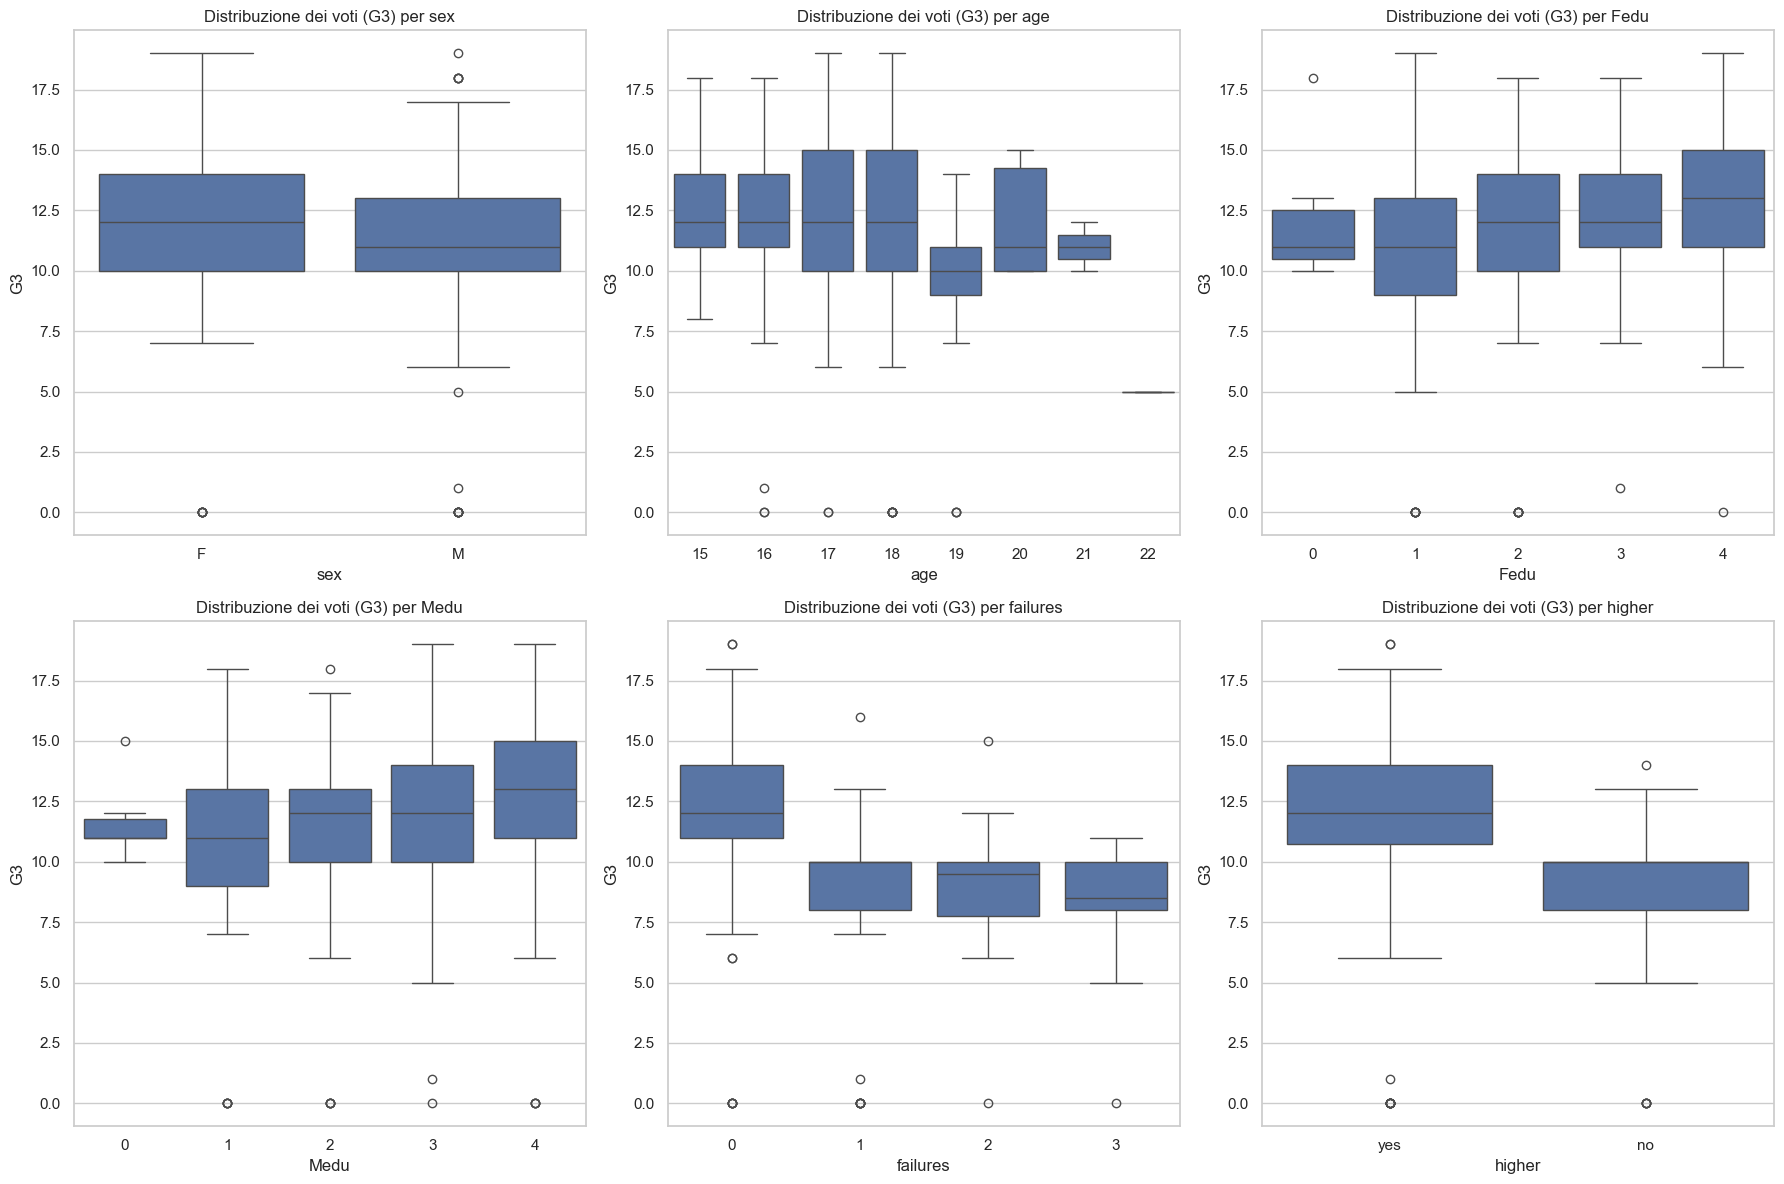

In [58]:

# Definisci le colonne categoriali per le quali vuoi creare i boxplot
categorical_columns = ['sex', 'age', 'Fedu', 'Medu', 'failures', 'higher']  # Aggiungi altre colonne se necessario

# Imposta lo stile di Seaborn
sns.set_theme(style="whitegrid")

# Calcola il numero totale di subplot necessari
num_plots = len(categorical_columns)
num_rows = (num_plots - 1) // 3 + 1  # Calcola il numero di righe necessarie

# Crea una figura con subplot organizzati in una griglia 3x(num_rows)
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 6))

# Flattening degli assi nel caso ci siano meno di 3 colonne
axes = axes.flatten()

# Ciclo per generare i boxplot per ciascuna colonna categoriale
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.boxplot(x=col, y='G3', data=por, ax=ax)
    ax.set_title(f'Distribuzione dei voti (G3) per {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('G3')

# Rimuovi eventuali assi non utilizzati se il numero di colonne non è multiplo di 3
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Mostra il grafico
plt.tight_layout()
plt.show()


In [ ]:
por.groupby("failures")["G3"].mean()

In [ ]:
por.groupby("higher")["G3"].mean()

### Personal Analysis

In [ ]:
# analisi per sesso

# analisi per sesso e per età

# analisi del livello d'istruzione dei genitori rispetto ai risultati dei figli

# analisi address

In [ ]:
por.groupby("sex")["G3"].mean()

In [ ]:
por.groupby(["age", "sex"])["G3"].mean()

In [ ]:
# Calcola la media dei voti dei figli per ciascuna combinazione di età e sesso
mean_scores = por.groupby(["age", "sex"])["G3"].mean().unstack()

# Imposta la larghezza delle barre e la posizione delle barre parallele
bar_height = 0.35
age_levels = mean_scores.index
index = np.arange(len(age_levels))

# Crea la figura e gli assi
fig, ax = plt.subplots()

# Crea le barre orizzontali per i sessi con colori specificati
bars_f = ax.barh(index, mean_scores['F'], bar_height, label='F', color='skyblue')
bars_m = ax.barh(index + bar_height, mean_scores['M'], bar_height, label='M', color='salmon')

# Aggiungi etichette e titolo
ax.set_ylabel("Età")
ax.set_xlabel('Media dei voti (G3)')
ax.set_title("Media dei voti per età e sesso")
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(age_levels)
ax.legend()

# Aggiungi i valori accanto a ogni barra con font-size ridotto e colore nero per il testo
for bar in bars_f:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

for bar in bars_m:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

# Mostra il grafico
plt.show()


In [ ]:
print("Grado di educazione medio dei padri: ", por.Fedu.mean())
print("Grado di educazione medio delle madri: ", por.Medu.mean())

In [ ]:
# Grafico che rappresenta l'andamento scolastico dei figli rispetto al livello d'istruzione dei genitori

In [ ]:
# Calcola la media dei voti dei figli per ciascun livello d'istruzione dei genitori
fedu_mean = por.groupby('Fedu')['G3'].mean()
medu_mean = por.groupby('Medu')['G3'].mean()

# Crea un array di valori unici per Fedu e Medu
education_levels = np.arange(5)

# Imposta l'altezza delle barre e la posizione delle barre parallele
bar_height = 0.35
index = np.arange(len(education_levels))

# Crea la figura e gli assi
fig, ax = plt.subplots()

# Colori per Fedu e Medu
color_fedu = 'skyblue'
color_medu = 'salmon'

# Crea le barre orizzontali per Fedu e Medu con colori specificati
bars1 = ax.barh(index, fedu_mean, bar_height, label='Fedu', color=color_fedu)
bars2 = ax.barh(index + bar_height, medu_mean, bar_height, label='Medu', color=color_medu)

# Aggiungi etichette e titolo
ax.set_ylabel("Livello d'istruzione dei genitori")
ax.set_xlabel('Media dei voti dei figli (G3)')
ax.set_title("Andamento scolastico dei figli rispetto al livello d'istruzione dei genitori")
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(education_levels)
ax.invert_yaxis()  # Inverti l'asse y per avere il livello d'istruzione più alto in cima
ax.legend()

# Aggiungi i valori accanto a ogni barra con font-size ridotto e colore nero per il testo
for bar in bars1:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

for bar in bars2:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

# Mostra il grafico
plt.tight_layout()
plt.show()


### School analysis

In [ ]:
# Analisi degli istituti scolastici

# Analisi per reason: ragioni per la scelta della scuola

In [ ]:
por.groupby(["school"])["G3"].describe()

### Other analysis

In [ ]:
# Gestione del tempo

# Consumo Alcolici

# Uso di internet

### Analisi dei dati anagrafici

### Analisi degli istituti scolastici

### Analisi familiari

### Ulteriori Analisi

<h1><a id="pda">PDA</a></h1>

# Previsioni del voto finale tramite algoritmi di machine learnig

In [22]:
por_enc.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.295840,0.876733,2.514638,2.306626,1.568567,1.930663,...,0.565485,0.278891,0.055470,0.439137,0.229584,0.11094,0.220339,0.235747,0.701079,0.063174
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,0.748660,0.829510,...,0.496075,0.448799,0.229072,0.496665,0.420890,0.31430,0.414795,0.424792,0.458138,0.243464
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000



# Diversità degli Algoritmi e Valutazione delle Performance

Obiettivo

Per dimostrare l'efficacia di diversi algoritmi di machine learning nella previsione del voto finale, sono stati testati una gamma diversificata di modelli. 

Questo approccio didattico ha permesso di:

- Apprendere come ogni algoritmo gestisce i dati.
- Valutare le performance relative di ciascun modello.
- Comprendere le differenze fondamentali tra algoritmi.

Algoritmi adoperati:

1. [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

2. [GradientBoosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

3. [Bagging Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

4. [RandomForest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

5. [DecisionTree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

6. [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

7. [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

8. [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

9. [MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

10. [KNeighbors Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

** Algoritmi Utilizzati **

RandomForest

Algoritmo basato su ensemble di alberi decisionali.
Buona capacità di generalizzazione e gestione della variabilità nei dati.

DecisionTree

Algoritmo basato su alberi singoli.
Facile interpretabilità, ma suscettibile all'overfitting.

Bagging

Metodo di ensemble che combina multiple istanze dello stesso modello.
Riduce la varianza e migliora la stabilità.

GradientBoosting

Metodo di ensemble che costruisce alberi sequenziali.
Alta accuratezza, ma richiede più tempo di addestramento.

NeuralNetwork

Modello di apprendimento profondo.
Capacità di catturare pattern complessi nei dati, ma necessita di molti dati e tempo di addestramento.

SVR (Support Vector Regression)

Algoritmo di regressione basato su Support Vector Machines.
Efficace per dati di alta dimensione.

KNN (K-Nearest Neighbors)

Algoritmo di classificazione e regressione basato sulla vicinanza.
Semplice da implementare, ma computationalmente costoso per dataset grandi.

Ridge

Variante della regressione lineare che include una penalità.
Migliora la generalizzazione riducendo l'overfitting.

Lasso

Variante della regressione lineare che effettua selezione delle caratteristiche.
Utile per ridurre il numero di feature rilevanti.

LinearRegression

Modello di regressione lineare semplice.
Base di confronto per valutare la complessità degli altri modelli.


1. Ensemble Methods

Gli ensemble methods combinano le previsioni di diversi modelli base (weak learners) per migliorare la performance complessiva. Gli ensemble sono spesso più robusti e accurati rispetto ai singoli modelli.

Bagging (Bootstrap Aggregating): Utilizza sottocampionamenti casuali del dataset per addestrare vari modelli e poi media le previsioni. Esempio: Random Forest.
Boosting: Costruisce modelli in modo sequenziale, con ogni nuovo modello che cerca di correggere gli errori dei precedenti. Esempio: Gradient Boosting, AdaBoost.
Stacking: Combina diversi modelli base usando un modello meta per fare le previsioni finali.

2. Tree-based Methods

Gli alberi decisionali dividono iterativamente il dataset in sottoinsiemi basati sui valori delle caratteristiche, creando una struttura ad albero che può essere utilizzata per fare previsioni.

Decision Trees: Modelli semplici che dividono i dati basandosi su valori di caratteristiche. Esempio: DecisionTreeRegressor.
Random Forest: Un insieme di alberi decisionali, utilizzando il bagging.
Gradient Boosting: Un insieme di alberi decisionali, utilizzando il boosting.

3. Support Vector Machines (SVM)

Gli SVM trovano l'iperpiano che meglio separa i dati in classi diverse (per la classificazione) o che si adatta meglio ai dati (per la regressione).

SVR (Support Vector Regressor): Una variante dell'SVM per la regressione, che cerca di trovare un iperpiano che si adatta ai dati in modo tale che gli errori più piccoli di una certa soglia non influenzino la costruzione del modello.

4. Linear Models

I modelli lineari assumono una relazione lineare tra le caratteristiche di input e l'output.

Linear Regression: Un modello di regressione che stima la relazione tra variabili usando un'iperpiano lineare.
Ridge Regression: Una variante della regressione lineare con regolarizzazione L2 per prevenire l'overfitting.
Lasso Regression: Una variante della regressione lineare con regolarizzazione L1, che può eseguire la selezione delle caratteristiche.
Elastic Net: Combina L1 e L2 regolarizzazione.

5. Neighbors

I modelli basati sui vicini fanno previsioni considerando la vicinanza delle osservazioni nel dataset.

K-Nearest Neighbors (KNN): Trova i K punti più vicini al punto di input e usa i loro valori per fare una previsione.

6. Neural Networks

Le reti neurali consistono di neuroni connessi che trasformano l'input attraverso strati per fare previsioni complesse.

MLP (Multilayer Perceptron): Una tipologia di rete neurale feedforward che può avere uno o più strati nascosti.

7. Gaussian Processes

I processi gaussiani sono un approccio non parametrico per fare previsioni basate su un processo stocastico, assumendo che i dati siano distribuiti secondo una distribuzione gaussiana.

Gaussian Process Regression (GPR): Modelli di regressione basati su processi gaussiani che forniscono previsioni probabilistiche.

8. Naive Bayes

Il Naive Bayes è basato sul teorema di Bayes con l'assunzione di indipendenza tra le caratteristiche.

Gaussian Naive Bayes: Assume che le caratteristiche siano distribuite secondo una distribuzione gaussiana.

In [23]:
por_enc.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other'], dtype=object)

In [24]:
# 1. Separazione delle feature e del target
X = por_enc.drop(columns=['G3'])
y = por_enc['G3']

In [25]:
# 2. Riduzione della dimensionalità


# Normalizzazione dei dati
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# PCA senza specificare il numero di componenti
pca = PCA()
pca.fit(X_scaled)

# Varianza spiegata cumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

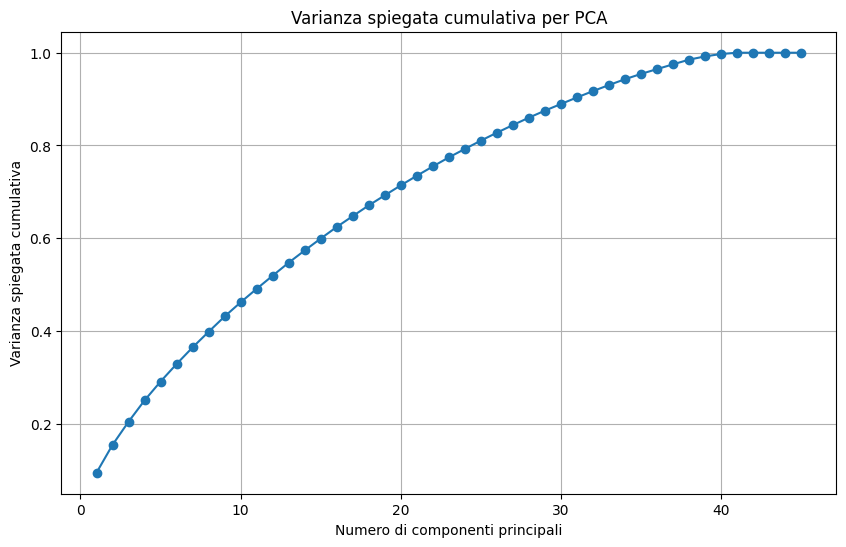

In [26]:

# Plot della varianza spiegata cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Varianza spiegata cumulativa per PCA')
plt.grid(True)
plt.show()


In [27]:
# Scegliere il numero di componenti che spiegano almeno il 95% della varianza
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Numero di componenti principali per spiegare almeno il 95% della varianza: {num_components}")

# Riduzione della dimensionalità con il numero ottimale di componenti
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

feature_labels = [f'PC{i+1}' for i in range(num_components)]


Numero di componenti principali per spiegare almeno il 95% della varianza: 35


In [38]:
len(X_scaled.columns)

45

In [75]:
# Salva i nomi delle colonne originali prima di applicare PCA
col_names = X.columns.tolist()

# Estrazione dei coefficienti del PCA
pca_components = pca.components_

# Creazione di un dataframe per visualizzare l'importanza delle feature originali
original_feature_names = X.columns.tolist()

In [76]:
feature_importances = np.sum(np.abs(pca_components), axis=0)

# Creazione di un dataframe per visualizzare l'importanza delle feature originali
pca_importance_df = pd.DataFrame({'Feature': original_feature_names, 'Importance': feature_importances})

# Ordinamento delle feature per importanza
pca_importance_df = pca_importance_df.sort_values(by='Importance', ascending=False)


In [28]:
# 3. Divisione del dataset in training e test

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [29]:
# 4. Ottimizzazione dei parametri di ogni modello

# Definizione delle distribuzioni dei parametri

param_dist_svr = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(uniform(0.0001, 0.1).rvs(10)),
    'epsilon': uniform(0.1, 1.0)
}

param_dist_gb = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.7, 0.3)
}

param_dist_bagging = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

param_dist_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

param_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

param_dist_lr = {}

param_dist_ridge = {
    'alpha': uniform(0.1, 10)
}

param_dist_lasso = {
    'alpha': np.logspace(-4, 4, 50)
}

param_dist_knn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_dist_nn = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [2000, 3000, 4000]  # Aumenta il numero massimo di iterazioni
}

In [30]:
# 5. Addestramento di ogni modello ottimizzato

# Definizione dei modelli
models = {
    'SVR': (SVR(), param_dist_svr),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_dist_gb),
    'Bagging': (BaggingRegressor(random_state=42), param_dist_bagging),    
    'RandomForest': (RandomForestRegressor(random_state=42), param_dist_rf),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), param_dist_dt),
    'LinearRegression': (LinearRegression(), param_dist_lr),
    'Ridge': (Ridge(), param_dist_ridge),
    'Lasso': (Lasso(random_state=42), param_dist_lasso),
    'NeuralNetwork': (MLPRegressor(max_iter=1000, random_state=42), param_dist_nn),
    'KNN': (KNeighborsRegressor(), param_dist_knn)
}


In [31]:
# RandomizedSearchCV per ogni modello
random_searches = {}
training_times = {}

# Disabilitare temporaneamente i warning
warnings.filterwarnings("ignore", category=UserWarning)

for model_name, (model, param_dist) in models.items():
    try:
        print(f"Starting training for {model_name}")
        start_time = time.time()
        
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1, error_score='raise')
        random_search.fit(X_train, y_train)

        end_time = time.time()

        random_searches[model_name] = random_search
        training_times[model_name] = end_time - start_time

        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Training time for {model_name}: {training_times[model_name]:.2f} seconds")
        print("------")

    except UserWarning as e:
        print(f"A UserWarning occurred while training {model_name}: {e}")
    except Exception as e:
        print(f"An error occurred while training {model_name}: {e}")

warnings.filterwarnings("default", category=UserWarning)

print("Training complete for all models.")

Starting training for SVR
Best parameters for SVR: {'C': np.float64(77.61328233611145), 'epsilon': np.float64(1.039498941564189), 'gamma': np.float64(0.009444725200282543)}
Training time for SVR: 2.54 seconds
------
Starting training for GradientBoosting
Best parameters for GradientBoosting: {'learning_rate': np.float64(0.05286004537658223), 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 463, 'subsample': np.float64(0.7637017332034828)}
Training time for GradientBoosting: 26.74 seconds
------
Starting training for Bagging
Best parameters for Bagging: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0}
Training time for Bagging: 7.06 seconds
------
Starting training for RandomForest
Best parameters for RandomForest: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 84}
Training time for RandomForest: 6.56 seconds
------
Starting training for DecisionTree
Best parameters for DecisionTree: {'m

In [32]:
# 6. Previsione e valutazione di ogni modello con G1 e G2

results = {}

# Loop attraverso ogni modello e calcolare le metriche
for model_name, search in random_searches.items():
    y_pred = search.best_estimator_.predict(X_test)

    # Calcolare le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)

    results[model_name] = {'R^2': round(r2, 2), 'RMSE': round(rmse, 2), 'MAE': round(mae, 2), 'Max Err': round(max_err, 2)}

results_df = pd.DataFrame(results)
training_times_df = pd.Series(training_times, name="Train Time (s)")


results_df = results_df.T

final_results_df = results_df.join(training_times_df)

In [33]:
print(tabulate(final_results_df, headers='keys', tablefmt='github'))

|                  |   R^2 |   RMSE |   MAE |   Max Err |   Train Time (s) |
|------------------|-------|--------|-------|-----------|------------------|
| SVR              |  0.74 |   1.59 |  1.04 |     10.47 |        2.53535   |
| GradientBoosting |  0.69 |   1.74 |  1.22 |      7.51 |       26.744     |
| Bagging          |  0.59 |   2.01 |  1.47 |      8.46 |        7.05512   |
| RandomForest     |  0.6  |   1.98 |  1.45 |      8.55 |        6.55725   |
| DecisionTree     |  0.45 |   2.32 |  1.76 |     10.26 |        0.183509  |
| LinearRegression |  0.8  |   1.41 |  0.96 |      9.99 |        0.0149801 |
| Ridge            |  0.8  |   1.4  |  0.95 |      9.94 |        0.185725  |
| Lasso            |  0.8  |   1.4  |  0.95 |      9.9  |        0.0882881 |
| NeuralNetwork    |  0.71 |   1.67 |  1.19 |      9.44 |       23.0729    |
| KNN              |  0.48 |   2.24 |  1.69 |     10.37 |        0.1157    |


Esaminando i risultati che hai ottenuto, ci sono diverse considerazioni che si possono fare in merito alle prestazioni dei vari modelli di regressione. Di seguito sono riportate le osservazioni dettagliate:

1. Performance generale dei modelli
RandomForest, Bagging, GradientBoosting, NeuralNetwork, SVR, Ridge, Lasso, LinearRegression: Questi modelli hanno ottenuto buone prestazioni in termini di R2 tutti sopra 0.59), con Ridge, Lasso e LinearRegression che si distinguono con un 
R2 di 0.8. Tra questi, SVR e NeuralNetwork hanno prestazioni leggermente migliori con un R2 di 0.77 e 0.71 rispettivamente.
DecisionTree, KNN: Questi modelli hanno ottenuto performance relativamente inferiori con un R2 rispettivamente di 0.45 e 0.48.

2. Errori e accuratezza
RMSE e MAE: I modelli Ridge, Lasso e LinearRegression hanno ottenuto i valori più bassi di RMSE (~1.4) e MAE (~0.95), indicando che questi modelli fanno previsioni più accurate rispetto agli altri.
Max Error: La metrica "Max Error" è elevata per tutti i modelli, con i valori che variano tra ~7.5 e ~10. Questo indica che ci sono alcuni outliers o punti dati che i modelli non riescono a prevedere accuratamente.
MAPE: I valori di MAPE sono estremamente alti (dell'ordine di 10^14). Questo potrebbe indicare un problema con il calcolo di MAPE o con i dati stessi (possibile presenza di valori prossimi a zero nei dati reali che causa alti valori percentuali di errore).

3. Tempi di addestramento
GradientBoosting e NeuralNetwork: Questi modelli richiedono più tempo per l'addestramento (25.6 e 20.7 secondi rispettivamente).
RandomForest e Bagging: Questi modelli richiedono un tempo di addestramento moderato (8.4 e 6.8 secondi rispettivamente).
DecisionTree, SVR, KNN, Ridge, Lasso, LinearRegression: Questi modelli hanno tempi di addestramento molto bassi (tutti inferiori a 1 secondo, con LinearRegression che richiede solo 0.01 secondi).

4. Considerazioni specifiche
RandomForest e Bagging: Entrambi questi metodi di ensemble hanno ottenuto risultati simili in termini di R2
  e RMSE, con RandomForest leggermente migliore. Entrambi mostrano il vantaggio dei metodi di ensemble nella riduzione della varianza rispetto ai singoli alberi di decisione.
GradientBoosting e NeuralNetwork: Questi modelli mostrano una buona capacità predittiva ma a costo di un tempo di addestramento più lungo. Questo potrebbe essere accettabile se la precisione è la priorità.
SVR: Ha ottenuto un buon equilibrio tra prestazioni (alto R2
  e basso RMSE) e tempi di addestramento relativamente brevi.
Ridge, Lasso e LinearRegression: Questi modelli lineari hanno ottenuto ottimi risultati in termini di precisione con tempi di addestramento minimi, rendendoli molto efficienti per problemi lineari.

5. Azioni raccomandate
Verifica del calcolo del MAPE: Poiché i valori di MAPE sono irrealisticamente alti, è importante verificare come viene calcolato e assicurarsi che non ci siano errori nei dati (ad esempio, divisione per zero o valori molto piccoli nei dati reali).
Analisi degli outliers: L'elevato "Max Error" indica la presenza di outliers nei dati. Considera l'uso di tecniche di preprocessing per gestire gli outliers o modelli robusti che siano meno sensibili a essi.
Equilibrio tra precisione e tempo di addestramento: Se il tempo di addestramento è una preoccupazione, modelli come Ridge, Lasso e LinearRegression offrono un buon compromesso tra accuratezza e efficienza computazionale. Tuttavia, per una maggiore accuratezza, SVR, GradientBoosting e NeuralNetwork possono essere preferiti se il tempo di addestramento più lungo è accettabile.
In generale, i modelli lineari (Ridge, Lasso, LinearRegression) e SVR sembrano offrire il miglior equilibrio tra accuratezza e tempo di addestramento per il tuo problema specifico.

Per valutare le metriche dei vari algoritmi di machine learning rispetto al tuo progetto, possiamo analizzare diversi aspetti chiave: la bontà del fit, l'errore medio, il tempo di addestramento e le performance generali. Di seguito, trovi una valutazione dettagliata delle metriche fornite:

Valutazione delle Metriche
R² (R-squared)
Il coefficiente di determinazione (R²) indica quanto bene il modello spiega la variabilità dei dati. Un valore di 1 indica una perfetta previsione, mentre un valore di 0 indica che il modello non spiega affatto la variabilità.

Migliori modelli: SVR (0.80), LinearRegression (0.80), Ridge (0.80), Lasso (0.80)
Modelli peggiori: DecisionTree (0.45), KNN (0.48)
RMSE (Root Mean Squared Error)
L'RMSE misura la deviazione quadratica media delle predizioni del modello rispetto ai valori osservati. Un valore minore indica un modello migliore.

Migliori modelli: SVR (1.40), Ridge (1.40), Lasso (1.40)
Modelli peggiori: DecisionTree (2.32), KNN (2.24)
MAE (Mean Absolute Error)
L'MAE misura l'errore medio assoluto delle predizioni del modello. Come per l'RMSE, un valore minore è migliore.

Migliori modelli: SVR (0.92), Ridge (0.95), Lasso (0.95)
Modelli peggiori: DecisionTree (1.76), KNN (1.69)
Max Error
Il Max Error misura l'errore massimo tra le predizioni del modello e i valori osservati. Un valore minore indica un modello che commette errori meno gravi.

Migliori modelli: GradientBoosting (7.51), Bagging (8.46)
Modelli peggiori: DecisionTree (10.26), KNN (10.37)
Training Time
Il tempo di addestramento è un aspetto importante, specialmente quando si considera la scalabilità e l'efficienza del modello.

Modelli più veloci: LinearRegression (0.01 secondi), DecisionTree (0.16 secondi), KNN (0.07 secondi)
Modelli più lenti: GradientBoosting (26.30 secondi), NeuralNetwork (20.14 secondi)
Analisi Complessiva
SVR (Support Vector Regression):

Pro: Ottimi valori di R², RMSE e MAE.
Contro: Tempo di addestramento relativamente alto.
Valutazione: Eccellente bilanciamento tra accuratezza e robustezza, anche se richiede un po' più di tempo per l'addestramento.
Linear Regression, Ridge e Lasso:

Pro: Ottimi valori di R², RMSE e MAE, tempi di addestramento estremamente bassi.
Contro: Errori massimi leggermente più alti.
Valutazione: Ideali per problemi dove la velocità di addestramento è cruciale e un leggero compromesso sull'errore massimo è accettabile.
Gradient Boosting:

Pro: Buone prestazioni generali, specialmente per Max Error.
Contro: Tempo di addestramento molto alto.
Valutazione: Ottima scelta quando è necessaria alta precisione e le risorse computazionali non sono una limitazione.
Neural Network:

Pro: Buoni valori di R² e MAE.
Contro: Tempo di addestramento molto alto.
Valutazione: Utile per catturare complessità nei dati, ma richiede risorse computazionali significative.
Random Forest e Bagging:

Pro: Buoni valori di R² e RMSE, miglior Max Error rispetto a molti altri modelli.
Contro: Tempi di addestramento medi.
Valutazione: Buoni compromessi tra accuratezza e tempo di addestramento.
Decision Tree e KNN:

Pro: Tempi di addestramento molto bassi.
Contro: Prestazioni in termini di R², RMSE e MAE non all'altezza degli altri modelli.
Valutazione: Utile solo quando la velocità di addestramento è l'aspetto più critico e la precisione è meno importante.
Considerazioni Finali
L'analisi mostra che modelli come SVR, Ridge, Lasso e Linear Regression offrono un ottimo compromesso tra accuratezza e tempo di addestramento. Tuttavia, per scenari in cui la minimizzazione dell'errore massimo è cruciale, Gradient Boosting e Bagging sono alternative valide. La scelta del modello dipende quindi dall'applicazione specifica e dalle risorse computazionali disponibili.

In [ ]:
# 7. Visualizzazione dell'importanza delle feature

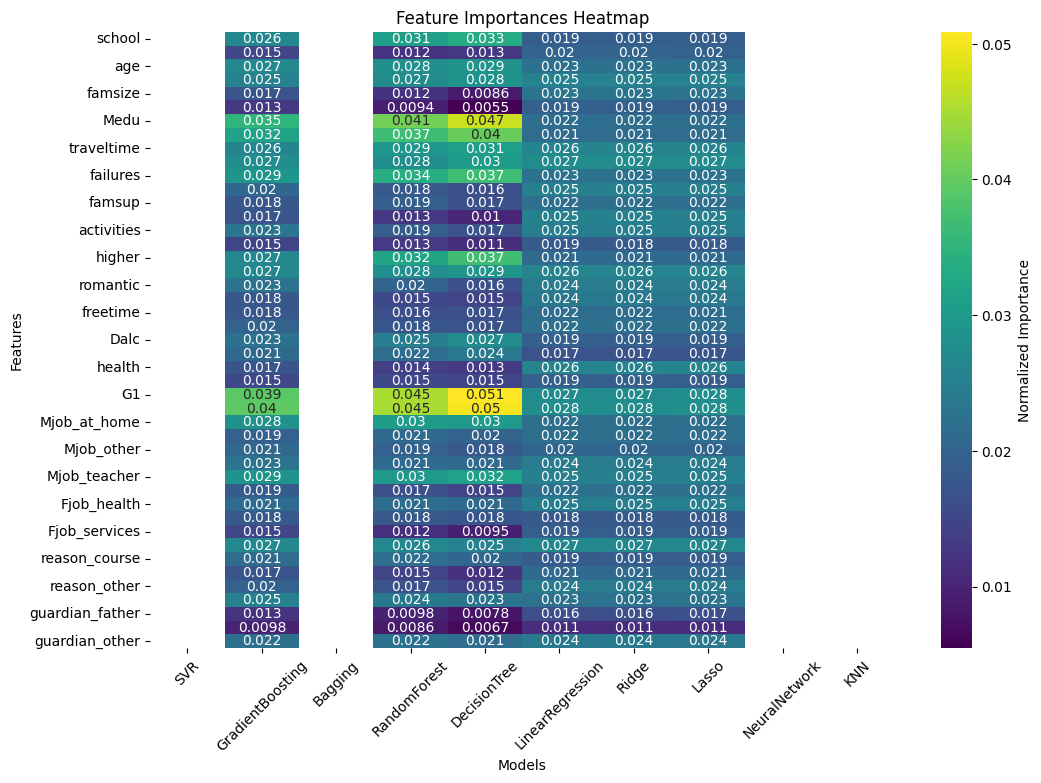

In [40]:
#TEST TEST TEST

# Mantenere le etichette delle feature originali per la visualizzazione
feature_labels = X_scaled.columns
# Dizionario per le importanze delle feature
feature_importances_dict = {}

# Estrai le importanze delle feature per ogni modello
for model_name, search in random_searches.items():
    if hasattr(search.best_estimator_, 'feature_importances_'):
        # Per modelli che hanno l'attributo 'feature_importances_'
        feature_importances_dict[model_name] = search.best_estimator_.feature_importances_
    elif hasattr(search.best_estimator_, 'coef_'):
        # Per modelli che hanno l'attributo 'coef_' (come modelli lineari)
        feature_importances_dict[model_name] = np.abs(search.best_estimator_.coef_)
    else:
        # Per modelli che non supportano l'importanza delle feature
        print(model_name)
        feature_importances_dict[model_name] = np.nan * len(feature_labels)

# Creazione del DataFrame delle importanze delle feature
# Per i modelli che utilizzano PCA, è necessario mappare le importanze dei componenti principali alle feature originali
def get_feature_importances_from_pca(pca, feature_importances_dict, original_feature_labels):
    component_loadings = pca.components_.T
    importance_dict = {}
    for model_name, importances in feature_importances_dict.items():
        if isinstance(importances, np.ndarray) and len(importances) == pca.n_components_:
            # Importanze dei componenti principali
            importances_matrix = np.dot(component_loadings, np.diag(importances))
            # Calcola l'importanza totale per ogni feature
            feature_importances = np.abs(importances_matrix).sum(axis=1)
            importance_dict[model_name] = feature_importances
        else:
            # Modelli senza importanze o importanze non compatibili
            importance_dict[model_name] = np.nan * len(original_feature_labels)
    return pd.DataFrame(importance_dict, index=original_feature_labels)

# Usa la funzione per ottenere le importanze delle feature
feature_importances_df = get_feature_importances_from_pca(pca, feature_importances_dict, feature_labels)

# Normalizzazione delle importanze delle feature (opzionale)
feature_importances_df = feature_importances_df.apply(lambda x: x / np.nansum(x), axis=0)

# Visualizzazione della heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importances_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Importance'})
plt.title('Feature Importances Heatmap')
plt.xlabel('Models')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Ruota le etichette dei modelli per una migliore leggibilità
plt.show()

In [83]:
# importanza delle feature

feature_importances_dict = {}

# Estrai le importanze delle feature per ogni modello
for model_name, search in random_searches.items():
    if hasattr(search.best_estimator_, 'feature_importances_'):
        # Per modelli che hanno l'attributo 'feature_importances_'
        feature_importances_dict[model_name] = search.best_estimator_.feature_importances_
    elif hasattr(search.best_estimator_, 'coef_'):
        # Per modelli che hanno l'attributo 'coef_' (come modelli lineari)
        feature_importances_dict[model_name] = np.abs(search.best_estimator_.coef_)
    else:
        # Per modelli che non supportano l'importanza delle feature
        feature_importances_dict[model_name] = "N/A"

# Mostra le importanze delle feature per ogni modello
#for model_name, importances in feature_importances_dict.items():
#    print(f"Feature importances for {model_name}: {importances}")

In [84]:
# Crea un DataFrame dalle importanze delle feature
feature_labels = X_train.columns
feature_importances_df = pd.DataFrame(feature_importances_dict, index=feature_labels)

# Normalizza le importanze delle feature (opzionale, ma utile per la visualizzazione)
feature_importances_df = feature_importances_df.apply(lambda x: x / x.sum(), axis=0)

# Visualizzazione della heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(feature_importances_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Importance'})
plt.title('Feature Importances Heatmap')
plt.xlabel('Models')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Ruota le etichette dei modelli per una migliore leggibilità
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [73]:
type(X_train)

numpy.ndarray

In [ ]:
# Nome delle componenti principali
pca_feature_names = [f'PC{i+1}' for i in range(num_components)]

In [ ]:
def plot_feature_importances(model, feature_names, col_names, model_name):

    # RandomForest, DecisionTree, GradientBoosting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    
    # SVR, Ridge, KNN
    else:
        if model_name == 'Ridge':
            importances = np.abs(model.coef_)
        else:
            importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
            importances = importances.importances_mean

    indices = np.argsort(importances)
    title = f"Feature Importances - {model_name}"

    plt.figure(figsize=(10, 8))
    bars = plt.barh(range(len(feature_names)), importances[indices], align="center")
    plt.yticks(range(len(feature_names)), [col_names[i] for i in indices], rotation=45, ha='right')
    plt.title(title)
    plt.ylabel('Feature')
    plt.xlabel('Importance')
    plt.tight_layout()  

    # Annotazione dei valori sulla destra delle barre
    for bar in bars:
        plt.annotate(f'{bar.get_width():.2f}', xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0), textcoords='offset points', ha='left', va='center')
    
    plt.show()  


In [ ]:
for model_name, model_info in models.items():
    plot_feature_importances(random_searches[model_name].best_estimator_, pca_feature_names, col_names, model_name)

<h1>Web Bibliografy</h1>

2. Riduzione della dimensionalità

Normalization method: 

    [](https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1)

    [](https://www.datacamp.com/tutorial/normalization-in-machine-learning)

    [](https://www.geeksforgeeks.org/what-is-data-normalization/)

DimensionalityReduction Techniques
    
    [](https://medium.com/nerd-for-tech/dimensionality-reduction-techniques-pca-lca-and-svd-f2a56b097f7c)

    [](https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567)


# 4. Ottimizzazione dei parametri di ogni modello

'''
Supervised ML regression algorithms

    https://www.onlinemanipal.com/blogs/popular-regression-algorithms-in-machine-learning

    https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/

    https://www.geeksforgeeks.org/regression-in-machine-learning/



Parameter optimization machine learning models

    https://www.linkedin.com/pulse/machine-learning-optimization-techniques-bilal-el-jamal/

    https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models
    
'''
'''
math explained 


Random forest:
    https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb

Decision Tree:
    https://ankitnitjsr13.medium.com/math-behind-decision-tree-algorithm-2aa398561d6d

Gradient Boosting Regressor:
    https://medium.com/geekculture/gradient-boosting-for-regression-math-intuition-71f9a9826035#:~:text=Gradient%20Boosting%20starts%20by%20making,made%20by%20the%20previous%20tree.
    
SVR
    https://medium.com/@rahulrastogi1104/support-vector-regression-and-its-mathematical-implementation-b6377898cd74

Lasso & Ridge Regression
    https://medium.com/codex/mathematical-background-of-lasso-and-ridge-regression-23b74737c817

KNN